In [1]:
import geo_plot
import grunn
import sonegeo
import geofunk
import math
import matplotlib.pyplot as plt

In [2]:
#Tangens til friksjonsvinkel
tan_fi = 0.7
#Attraksjon
attraksjon = 10
#Mektighet lagpakke
z_lag = 5
#Grunnvanstand
u = 2

#Tyngdetetthet
gamma = 20
#Materialfaktor
gamma_m = 1.4

tan_fi_d = tan_fi/gamma_m
#minimum b0
b0_min = 0.5
#maksimum b0
b0_maks = 5

#vertikalkrefter
fv_fund = 360
#Dybde til underkant fundament
z = 2
#Horisontalkrefter
fh = 120

fundament_tykkelse = 0.2

helling_forhold = 0.33



In [3]:
grus = grunn.JordLag("grus", 500, 20)
sand = grunn.JordLag("sand", 1500, 19)
grus.sett_styrke_parameter(tanphi=tan_fi, attraksjon=attraksjon)
sand.sett_styrke_parameter(phi_grader=33, attraksjon=4)
jordprofil = grunn.JordProfil([grus, sand], u=2)
print(jordprofil)
print(jordprofil.get_tan_phi_lag(lagnr=0))
print(jordprofil.get_tan_phi_lag(lagnavn='sand'))
print(jordprofil.jordarter[0].gamma)
print(jordprofil.get_gamma_lag(lagnr=0))


Lag i Jordprofilet
Lag med navn: grus med mektihget: 5.0 m
 Parametere:  
 phi_grader=35, tanphi=0.7, attraksjon=10, kohesjon=7.0, cu=0 
Lag med navn: sand med mektihget: 15.0 m
 Parametere:  
 phi_grader=33, tanphi=0.65, attraksjon=4, kohesjon=2.6, cu=0 

0.7
0.65
20
20


In [4]:
fundament = grunn.Fundament(1, z, fv_fund, fh, gamma_m, jordprofil)
print(geofunk.n_fakt(0.5, 0.59))
print(f'Før delta_v Qv:{fundament.qv}')
fundament.sett_delta_fv()
print(f'Etter delta_v Qv:{fundament.qv}')
fundament.sett_rb()
print(f'Etter delta_v tan_fi_d:{fundament.tan_fi_d}')
print(f'Etter delta_v attrakson:{fundament.attraksjon}')
print(f'Etter delta_v tau:{fundament.tau}')
print(f'Etter delta_v rb:{fundament.rb}')
fundament.nq_ngamma_faktor()
fundament.reduksjonsfaktor_v220(helling_forhold)
print(f'fsa:{fundament.fsa}, fsq:{fundament.fsq}')
fundament.sigma_v()
print(f'b0:{fundament.b0}, rb:{fundament.rb}, Nq:{fundament.nq}, Ngamma:{fundament.n_gamma}, Sigma_v:{fundament.sigma_v_}, Qv:{fundament.qv}')
print(fundament.sigma_v())


(6.7032146311826155, 3.3029361689310854)
Før delta_v Qv:360.0
Etter delta_v Qv:400.0
Etter delta_v tan_fi_d:0.5
Etter delta_v attrakson:10
Etter delta_v tau:120.0
Etter delta_v rb:0.5853658536585366
0.5 0.5853658536585366
fsa:0.73, fsq:0.36
b0:1, rb:0.5853658536585366, Nq:6.746067860304088, Ngamma:3.351846615933853, Sigma_v:142.42299647727964, Qv:400.0
142.4


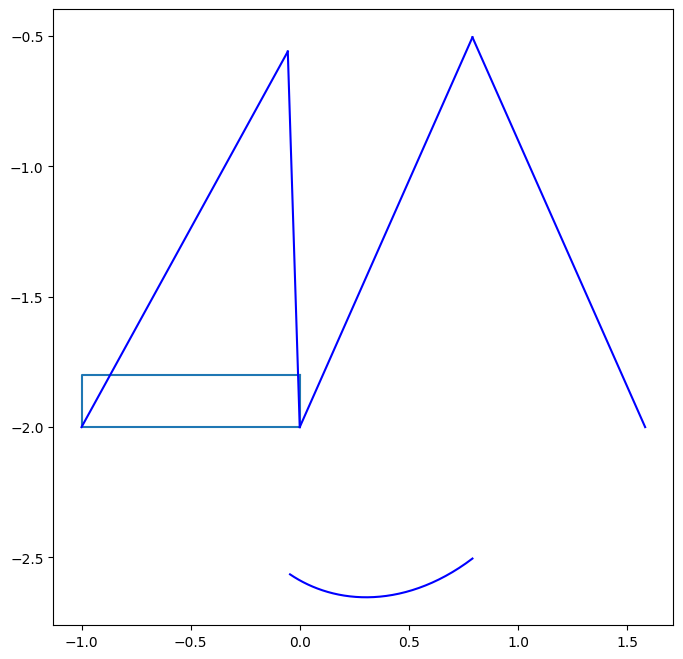

In [5]:
fig, ax1 = plt.subplots(figsize=[8,8])
sonegeo = sonegeo.SoneGeometri(fundament,jordprofil)
ax1 = fundament.tegn_fundament()
ax1 = sonegeo.tegn_sonegeometri()

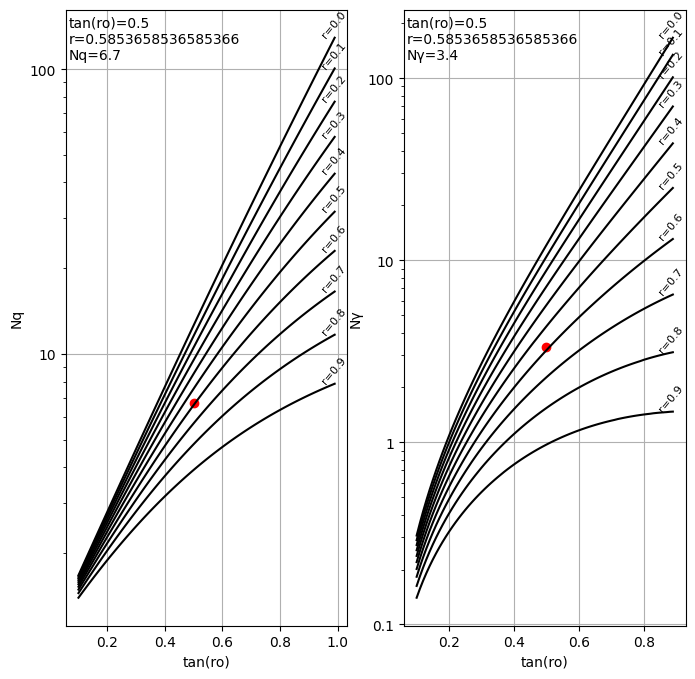

In [6]:
geo_plot.plot_nfakt(fundament.tan_fi_d, fundament.rb, fundament.nq, fundament.n_gamma)
plt.show()